In [20]:
import pandas as pd
import numpy as np

In [2]:
cluster1_now_path = 'business_cluster1_now.csv'
cluster1_now = pd.read_csv(cluster1_now_path)
cluster1_now

,business_id,stars_now,review_count_now
0,qhDdDeI3K4jy2KyzwFN53w,4.0,48
1,lOP3HxdUTaq0eXhwR_KC-w,4.4,24
2,7clCBgNbd-x2Wj96lZ6Mjw,4.5,152
3,jiLGdnf42eYftkqfU2ze1w,3.3,38
4,Q3kQYhkYxSRyYyeBgtk--A,4.3,7
...,...,...,...
855,jSSaOCOS8wnmrOUUOz3hpw,4.1,14
856,Y0EG7hB8aSeAk1PRvD_HpQ,4.1,193
857,2bRC8KQ1atx2UmbFJQdmxw,4.7,19
858,EVu72ZfMe7IpUWhD1el5kA,4.8,25


In [4]:
business_path = '../city_filter/businesses_Indianapolis.csv'
business_df = pd.read_csv(business_path)

In [5]:
# 从business_df 提取 cluster1_now 中的 business_id 的 stars和review_count
cluster1_now_business_id = cluster1_now['business_id'].tolist()
cluster1_now['stars'] = 0
cluster1_now['review_count'] = 0
for i in range(len(cluster1_now)):
    business_id = cluster1_now_business_id[i]
    stars = business_df[business_df['business_id'] == business_id]['stars'].values[0]
    review_count = business_df[business_df['business_id'] == business_id]['review_count'].values[0]
    cluster1_now.at[i, 'stars'] = stars
    cluster1_now.at[i, 'review_count'] = review_count

cluster1_now

/tmp/ipykernel_2286/2919219378.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cluster1_now.at[i, 'stars'] = stars


,business_id,stars_now,review_count_now,stars,review_count
0,qhDdDeI3K4jy2KyzwFN53w,4.0,48,4.0,38
1,lOP3HxdUTaq0eXhwR_KC-w,4.4,24,4.0,13
2,7clCBgNbd-x2Wj96lZ6Mjw,4.5,152,4.5,139
3,jiLGdnf42eYftkqfU2ze1w,3.3,38,3.5,29
4,Q3kQYhkYxSRyYyeBgtk--A,4.3,7,5.0,5
...,...,...,...,...,...
855,jSSaOCOS8wnmrOUUOz3hpw,4.1,14,4.0,7
856,Y0EG7hB8aSeAk1PRvD_HpQ,4.1,193,4.0,156
857,2bRC8KQ1atx2UmbFJQdmxw,4.7,19,4.5,17
858,EVu72ZfMe7IpUWhD1el5kA,4.8,25,5.0,24


In [7]:
cluster1_now['increase_stars'] = cluster1_now['stars_now'] - cluster1_now['stars']
cluster1_now['increase_review_count'] = cluster1_now['review_count_now'] - cluster1_now['review_count']
cluster1_now['growth_rate_stars'] = cluster1_now['increase_stars'] / cluster1_now['stars']
cluster1_now['growth_rate_review_count'] = cluster1_now['increase_review_count'] / cluster1_now['review_count']

average_stars_now = cluster1_now['stars_now'].mean()
average_review_count_now = cluster1_now['review_count_now'].mean()
average_increase_stars = cluster1_now['increase_stars'].mean()
average_increase_review_count = cluster1_now['increase_review_count'].mean()
average_growth_rate_stars = cluster1_now['growth_rate_stars'].mean()
average_growth_rate_review_count = cluster1_now['growth_rate_review_count'].mean()
print("Average stars now:", average_stars_now)
print("Average review count now:", average_review_count_now)
print("Average increase stars:", average_increase_stars)
print("Average increase review count:", average_increase_review_count)
print("Average growth rate stars:", average_growth_rate_stars)
print("Average growth rate review count:", average_growth_rate_review_count)

Average stars now: 4.05906976744186
Average review count now: 53.66279069767442
Average increase stars: -0.05372093023255815
Average increase review count: 14.513953488372094
Average growth rate stars: -0.010330657069029166
Average growth rate review count: 0.567659501768935


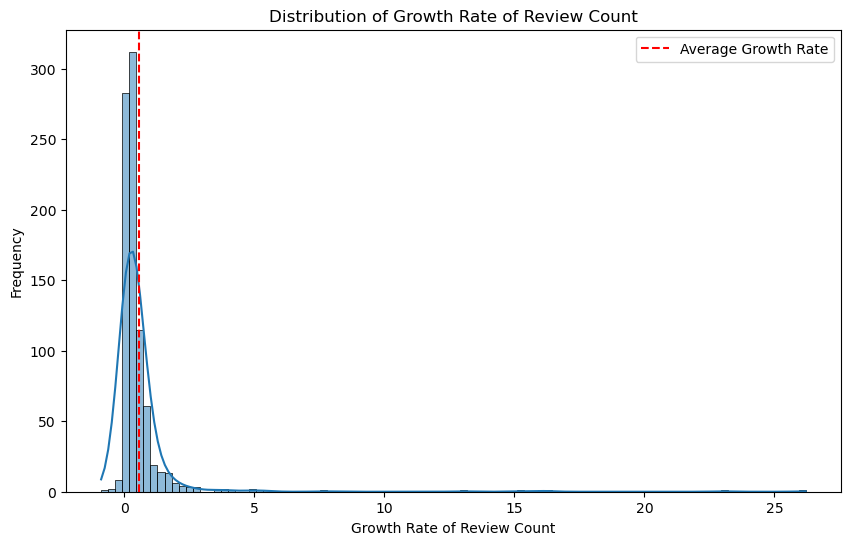

In [9]:
# 绘制评论增长率的分布
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(cluster1_now['growth_rate_review_count'], bins=100, kde=True)
plt.title('Distribution of Growth Rate of Review Count')
plt.xlabel('Growth Rate of Review Count')
plt.ylabel('Frequency')
plt.axvline(average_growth_rate_review_count, color='red', linestyle='--', label='Average Growth Rate')
plt.legend()
plt.show()

In [12]:
# 用评论增长率排序
cluster1_now_sorted = cluster1_now.sort_values(by='growth_rate_review_count', ascending=False)
cluster1_now_sorted_top100 = cluster1_now_sorted.head(100)
cluster1_now_sorted_top100

,business_id,stars_now,review_count_now,stars,review_count,increase_stars,increase_review_count,growth_rate_stars,growth_rate_review_count
377,MknwuLhOJ96naxbmm12CPQ,4.5,136,5.0,5,-0.5,131,-0.100000,26.200000
361,QAUKgKkO26KiNa0r1N2DFA,4.0,313,4.5,13,-0.5,300,-0.111111,23.076923
408,kWbCmkx7Pd1kzHDT919FLA,4.5,86,5.0,5,-0.5,81,-0.100000,16.200000
542,qvGoBKNSoW6PW1eE0C3t6A,3.5,85,4.0,5,-0.5,80,-0.125000,16.000000
234,4ihK-CfFXNVIxN_twd63ZQ,4.6,419,4.5,26,0.1,393,0.022222,15.115385
...,...,...,...,...,...,...,...,...,...
81,2kEpTU31GMqMPEo8P_Z4TA,1.5,19,1.5,10,0.0,9,0.000000,0.900000
363,D20SSLc_NBW_0ILZMSbpqw,4.4,17,5.0,9,-0.6,8,-0.120000,0.888889
239,bZ7VLu957j6xbM8-j3lKgQ,4.1,17,4.5,9,-0.4,8,-0.088889,0.888889
636,MruqWDUrgigjONJHOoE7eg,3.9,17,3.5,9,0.4,8,0.114286,0.888889


In [14]:
cluster1_now_sorted.to_csv('cluster1_now_sorted.csv', index=False)

In [18]:
#cluster1_now_sorted_top100的平均评论数、最小值、最大值
average_review_count_top100 = cluster1_now_sorted_top100['review_count'].mean()
print("Average review count of top 100:", average_review_count_top100)
#cluster1_now_sorted_top100的平均评论数、最小值、最大值
min_review_count_top100 = cluster1_now_sorted_top100['review_count'].min()
print("Min review count of top 100:", min_review_count_top100)
max_review_count_top100 = cluster1_now_sorted_top100['review_count'].max()
print("Max review count of top 100:", max_review_count_top100)

Average review count of top 100: 19.76
Min review count of top 100: 5
Max review count of top 100: 154


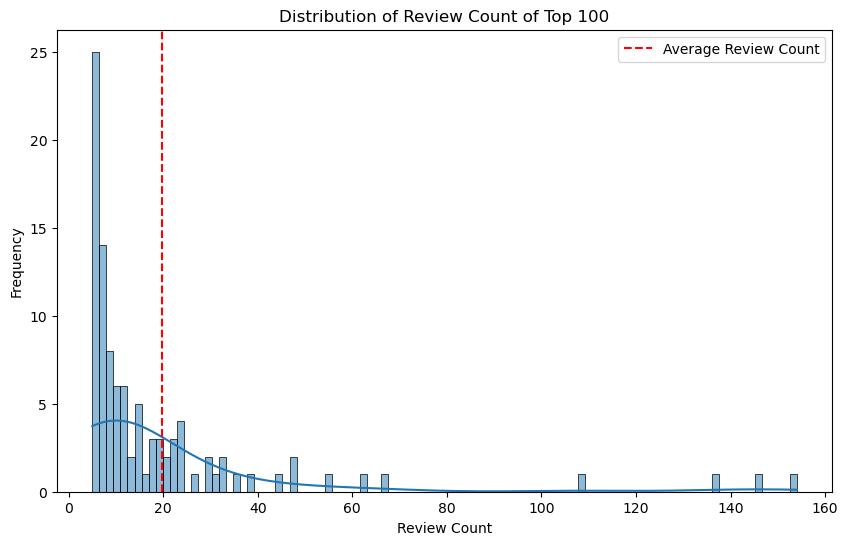

In [17]:
#cluster1_now_sorted_top100的评论数分布
plt.figure(figsize=(10, 6))
sns.histplot(cluster1_now_sorted_top100['review_count'], bins=100, kde=True)
plt.title('Distribution of Review Count of Top 100')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.axvline(average_review_count_top100, color='red', linestyle='--', label='Average Review Count')
plt.legend()
plt.show()

/tmp/ipykernel_2286/1692429321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_now_sorted_top100['review_bin'] = pd.cut(cluster1_now_sorted_top100['review_count'], bins=bins, labels=bin_labels)
/tmp/ipykernel_2286/1692429321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_now_sorted_top100['star_rounded'] = cluster1_now_sorted_top100['stars'].round(1)
/tmp/ipykernel_2286/1692429321.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=T

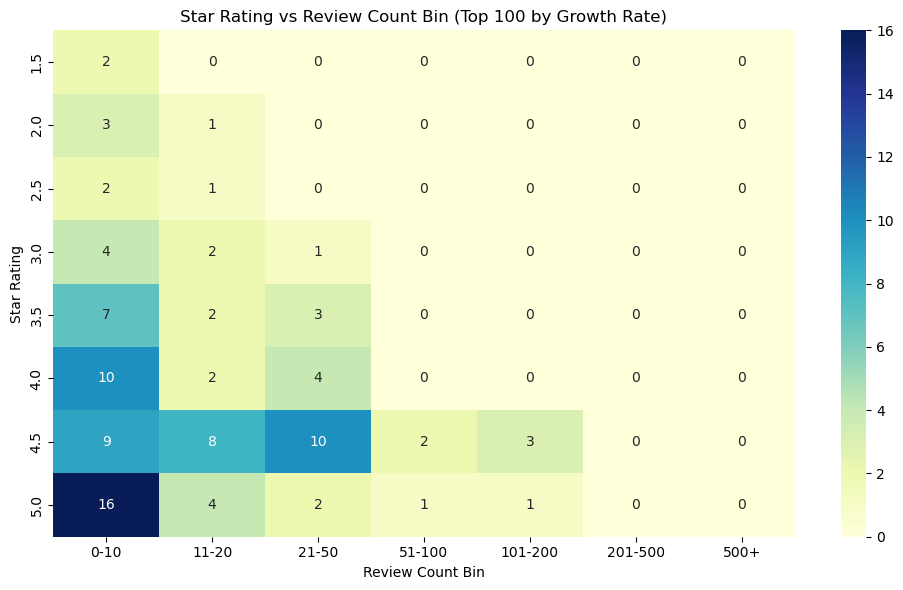

In [21]:

# 定义评论数分段（bin）
bins = [0, 10, 20, 50, 100, 200, 500, np.inf]
bin_labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '500+']
cluster1_now_sorted_top100['review_bin'] = pd.cut(cluster1_now_sorted_top100['review_count'], bins=bins, labels=bin_labels)

# 星级离散化（保留一位小数）
cluster1_now_sorted_top100['star_rounded'] = cluster1_now_sorted_top100['stars'].round(1)

# 构建热力图所需的数据表
heatmap_data = cluster1_now_sorted_top100.pivot_table(
    index='star_rounded',
    columns='review_bin',
    values='business_id',
    aggfunc='count',
    fill_value=0
)

# 绘图
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Star Rating vs Review Count Bin (Top 100 by Growth Rate)")
plt.xlabel("Review Count Bin")
plt.ylabel("Star Rating")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2286/4127529380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_now_sorted_top100['review_bin'] = pd.cut(cluster1_now_sorted_top100['review_count'], bins=bins, labels=bin_labels)
/tmp/ipykernel_2286/4127529380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_now_sorted_top100['star_rounded'] = cluster1_now_sorted_top100['stars'].round(1)
/tmp/ipykernel_2286/4127529380.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=T

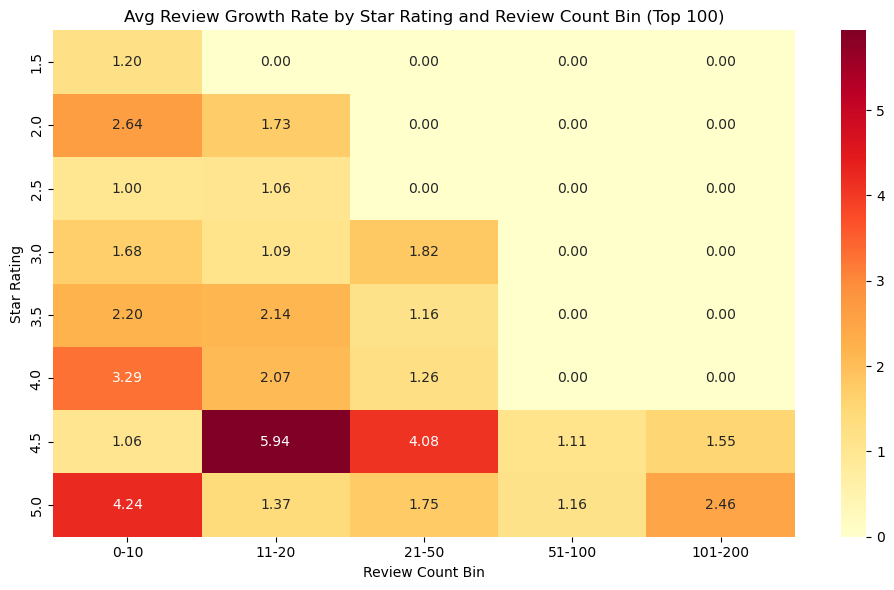

In [22]:
# 重新构建热力图数据：每格是对应组的平均评论数增长率

# 将 review_count 分箱
bins = [0, 10, 20, 50, 100, 200, 500, np.inf]
bin_labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '500+']
cluster1_now_sorted_top100['review_bin'] = pd.cut(cluster1_now_sorted_top100['review_count'], bins=bins, labels=bin_labels)

# 星级离散化（保留一位小数）
cluster1_now_sorted_top100['star_rounded'] = cluster1_now_sorted_top100['stars'].round(1)

# 构建新透视表：每个格子是平均评论增长率
heatmap_growth = cluster1_now_sorted_top100.pivot_table(
    index='star_rounded',
    columns='review_bin',
    values='growth_rate_review_count',
    aggfunc='mean',
    fill_value=0
)

# 绘制热力图（颜色表示增长率）
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_growth, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Avg Review Growth Rate by Star Rating and Review Count Bin (Top 100)")
plt.xlabel("Review Count Bin")
plt.ylabel("Star Rating")
plt.tight_layout()
plt.show()
